# Machine Learning to predict risk of crimes based on the location, time and presence of trees

In [44]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt


In [45]:
# Importing the dataset from parquet file
trees_crimes_people_df = pd.read_parquet('matched_data.parquet')
trees_crimes_people_df.head()

,Longitude,Latitude,hour_of_day,day_of_week,F,M,fair_tree_count,good_tree_count,poor_tree_count
0,-74.25,40.5004,0,0,0,1,20,154,0
1,-74.25,40.5004,0,1,0,0,20,154,0
2,-74.25,40.5004,0,2,0,1,20,154,0
3,-74.25,40.5004,0,3,1,0,20,154,0
4,-74.25,40.5004,0,4,0,0,20,154,0


# Dividing the dataset into the feature matrix and the target vector

In [46]:
# Slide the dataframe and move colums 4 and 5 to df Y. Keep the rest in df X
Y = trees_crimes_people_df.iloc[:, 4:5]

X = trees_crimes_people_df.iloc[:,[0,1,2,3,6,7,8]]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Baseline: Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))
print("MAPE: ", mean_absolute_percentage_error(Y_test, Y_pred))

MSE:  54.72092320155289
MAE:  4.676501485650232
MAPE:  4838356067768301.0


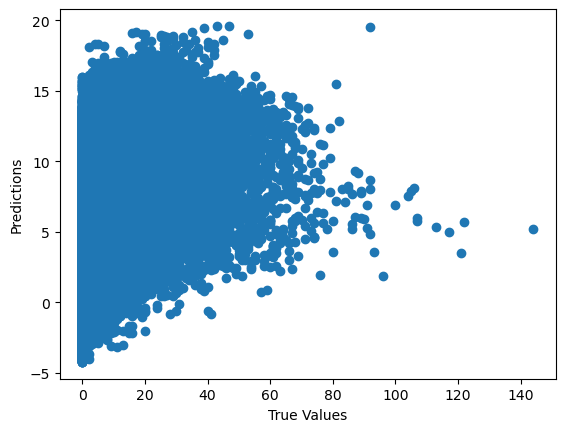

In [49]:
# plot the linear regression model using matplotlib
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


# Test different regression models

In [50]:
from sklearn.linear_model import Perceptron, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Convert Y_train and Y_test to 1D array
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

names = [
    "Lasso",
    "Elastic Net",
    # "Linear SVM",
    "Decision Tree",
    "Random Forest",
    # "AdaBoost",
    "Neural Net",
    "K-Nearest Neighbours"
]

regressors = [
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    # SVR(kernel="linear", C=0.025),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    # AdaBoostRegressor(),
    MLPRegressor(alpha=1, max_iter=1000),
    KNeighborsRegressor(3),
]

In [51]:
categorical_technique_list = ["Just one"]
X_train_list = [X_train]
X_test_list = [X_test]

# Create a dictionary to store the dataframes of the results for each method
results_dict = {}

MSE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))
MAE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))
MAPE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))

for technique,X_train,X_test in zip(categorical_technique_list,X_train_list,X_test_list):
    print("[INFO] - Categorical technique: ", technique)
    MSE_line = {"Dataset Name": technique}
    MAE_line = {"Dataset Name": technique}
    MAPE_line = {"Dataset Name": technique}

    for regressor,method_name in zip(regressors,names):
        print("[INFO] - Regressor: ", method_name)
        regressor.fit(X_train, Y_train)
        Y_pred = regressor.predict(X_test)
        # create a dataframe with the Y_test and Y_pred
        Y_test_Y_pred_df = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
        # append the dataframe to the dictionary
        results_dict[method_name] = Y_test_Y_pred_df
        # calculate the MSE, MAE and MAPE
        MSE_line[method_name] = mean_squared_error(Y_test, Y_pred)
        MAE_line[method_name] = mean_absolute_error(Y_test, Y_pred)
        MAPE_line[method_name] = mean_absolute_percentage_error(Y_test, Y_pred)


    # using pandas concat to append the new line to the dataframe
    MSE_per_dataset_df = pd.concat([MSE_per_dataset_df, pd.DataFrame([MSE_line])], ignore_index=True)
    MAE_per_dataset_df = pd.concat([MAE_per_dataset_df, pd.DataFrame([MAE_line])], ignore_index=True)
    MAPE_per_dataset_df = pd.concat([MAPE_per_dataset_df, pd.DataFrame([MAPE_line])], ignore_index=True)


[INFO] - Categorical technique:  Just one
[INFO] - Regressor:  Lasso
[INFO] - Regressor:  Elastic Net
[INFO] - Regressor:  Decision Tree
[INFO] - Regressor:  Random Forest
[INFO] - Regressor:  Neural Net
[INFO] - Regressor:  K-Nearest Neighbours


In [52]:
MSE_per_dataset_df
# unpivot the dataframe
MSE_per_dataset_df = MSE_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='MSE')
MSE_per_dataset_df

,Dataset Name,Method,MSE
0,Just one,Lasso,56.739021
1,Just one,Elastic Net,59.148555
2,Just one,Decision Tree,41.315855
3,Just one,Random Forest,42.999616
4,Just one,Neural Net,51.181149
5,Just one,K-Nearest Neighbours,9.153458


In [53]:
MAE_per_dataset_df
# unpivot the dataframe

,Dataset Name,Lasso,Elastic Net,Decision Tree,Random Forest,Neural Net,K-Nearest Neighbours
0,Just one,4.633886,4.730247,3.610396,3.786157,4.026148,1.753851


In [54]:
MAE_per_dataset_df = MAE_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='MAE')
MAE_per_dataset_df

,Dataset Name,Method,MAE
0,Just one,Lasso,4.633886
1,Just one,Elastic Net,4.730247
2,Just one,Decision Tree,3.610396
3,Just one,Random Forest,3.786157
4,Just one,Neural Net,4.026148
5,Just one,K-Nearest Neighbours,1.753851


In [55]:
MAPE_per_dataset_df

,Dataset Name,Lasso,Elastic Net,Decision Tree,Random Forest,Neural Net,K-Nearest Neighbours
0,Just one,4.513637e+15,4.613325e+15,2.172915e+15,3.048903e+15,2.658984e+15,6.993451e+14


In [56]:
# For plot the MSE, MAE and MAPE in a bar chart for each method
alt.Chart(MSE_per_dataset_df).mark_bar().encode(
    x='Method',
    y='MSE',
).properties(
    width=300,
    height=300
)



alt.Chart(...)

In [57]:
# display the feature importance for each method
for method_name in names:
    print("[INFO] - Method: ", method_name)
    print(results_dict[method_name].corr())
    print("")

[INFO] - Method:  Lasso
        Y_test  Y_pred
Y_test  1.0000  0.4098
Y_pred  0.4098  1.0000

[INFO] - Method:  Elastic Net
          Y_test    Y_pred
Y_test  1.000000  0.362688
Y_pred  0.362688  1.000000

[INFO] - Method:  Decision Tree
          Y_test    Y_pred
Y_test  1.000000  0.627193
Y_pred  0.627193  1.000000

[INFO] - Method:  Random Forest
          Y_test    Y_pred
Y_test  1.000000  0.639178
Y_pred  0.639178  1.000000

[INFO] - Method:  Neural Net
          Y_test    Y_pred
Y_test  1.000000  0.513486
Y_pred  0.513486  1.000000

[INFO] - Method:  K-Nearest Neighbours
          Y_test    Y_pred
Y_test  1.000000  0.930604
Y_pred  0.930604  1.000000



# Intrinsic Explainability

In [73]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/


Feature: Feature 0, Score: 1.00415
Feature: Feature 1, Score: 0.87001
Feature: Feature 2, Score: 25.11611
Feature: Feature 3, Score: 3.25005
Feature: Feature 4, Score: 82.81600
Feature: Feature 5, Score: 86.77275
Feature: Feature 6, Score: 66.65607


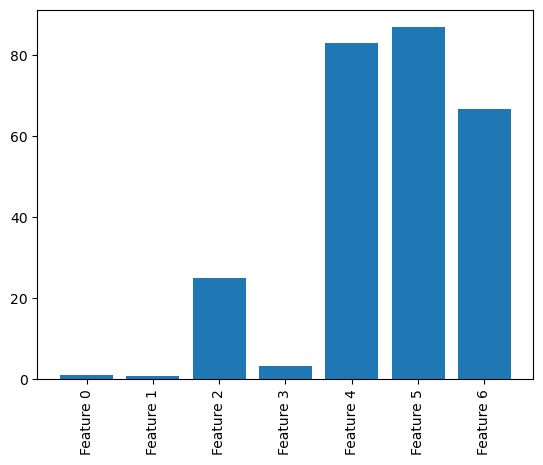

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsRegressor(3)

# fit the model
model.fit(X_train, Y_train)

# perform permutation importance
results = permutation_importance(model, X_test, Y_test, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

Feature: Longitude, Score: 1.00415
Feature: Latitude, Score: 0.87001
Feature: hour_of_day, Score: 25.11611
Feature: day_of_week, Score: 3.25005
Feature: fair_tree_count, Score: 82.81600
Feature: good_tree_count, Score: 86.77275
Feature: poor_tree_count, Score: 66.65607


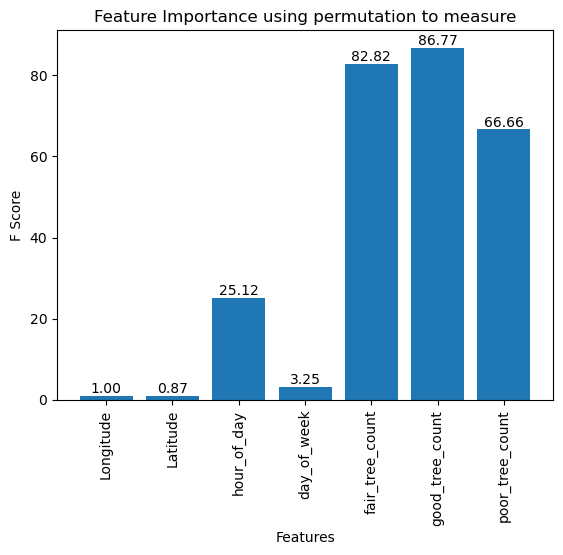

In [92]:
# get the feature names from the dataset
feature_names = list(X_test.columns)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# plot feature importance
pyplot.title("Feature Importance using permutation to measure")
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
pyplot.xlabel("Features")
pyplot.ylabel("F Score")

# Display the score rounded to two decimal places on top of each bar
for i in range(len(importance)):
    plt.text(i, importance[i], "{:.2f}".format(importance[i]), ha='center', va='bottom')
    
pyplot.show()

# LIME

In [100]:
import lime
import lime.lime_tabular
from lime import submodular_pick
from lime.lime_tabular import LimeTabularExplainer


In [108]:
# Get feature names from the input DataFrame
feature_names = X_train.columns.tolist()

# Create the LIME explainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['target'], mode='regression')

# Generate explanations for a single prediction
exp = explainer.explain_instance(X_test.values[0], knn.predict, num_features=len(feature_names))

C:\Users\Kelvi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [109]:
predict_fn = lambda x: knn.predict(x.reshape(1,-1)).astype(float)


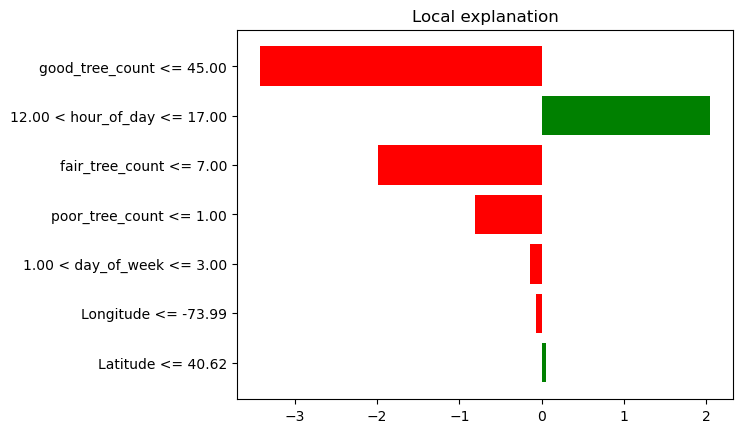

In [110]:
# Visualize the explanation 
%matplotlib inline
fig = exp.as_pyplot_figure()

In [1]:
exp.show_in_notebook(show_all=True)

NameError: name 'exp' is not defined

In [112]:
exp.as_list()

[('good_tree_count <= 45.00', -3.429858684164526),
 ('12.00 < hour_of_day <= 17.00', 2.051814230762995),
 ('fair_tree_count <= 7.00', -1.9886936470437124),
 ('poor_tree_count <= 1.00', -0.8124282280605661),
 ('1.00 < day_of_week <= 3.00', -0.1356113631573724),
 ('Longitude <= -73.99', -0.0672759357488189),
 ('Latitude <= 40.62', 0.04793590965560265)]